In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
iris = load_iris()

# Convert to pandas DataFrame for easier printing
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target  # Add the target variable column

# Print the DataFrame
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [18]:
X = iris.data
y = iris.target

# a. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\nsquared_error = 0.658\nsamples = 120\nvalue = 0.992'),
 Text(0.23076923076923078, 0.7857142857142857, 'squared_error = 0.0\nsamples = 40\nvalue = 0.0'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\nsquared_error = 0.25\nsamples = 80\nvalue = 1.488'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\nsquared_error = 0.026\nsamples = 37\nvalue = 1.027'),
 Text(0.07692307692307693, 0.5, 'squared_error = 0.0\nsamples = 36\nvalue = 1.0'),
 Text(0.23076923076923078, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\nsquared_error = 0.103\nsamples = 43\nvalue = 1.884'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\nsquared_error = 0.25\nsamples = 8\nvalue = 1.5'),

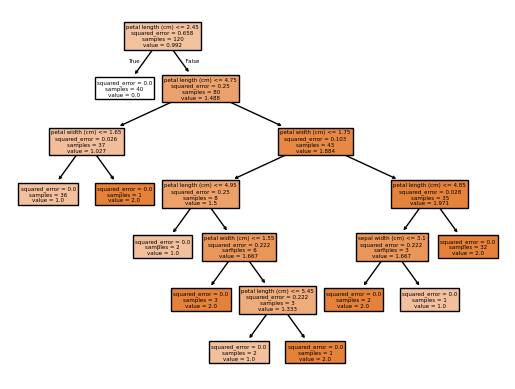

In [20]:
# Create a DecisionTreeRegressor instance
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Visualize the regression tree
# Use iris.feature_names instead of X.columns
plot_tree(regressor, feature_names=iris.feature_names, filled=True)

In [9]:
# b. Build the decision tree for classification
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Check model performance on training and test data sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 1.0


[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica

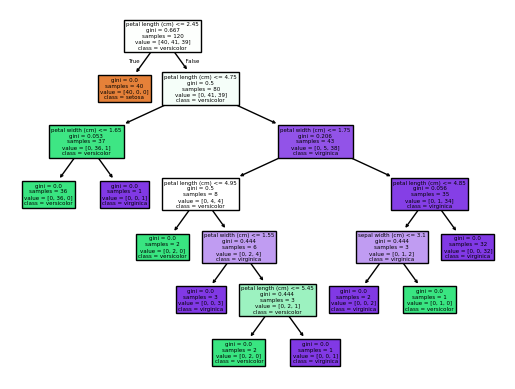

In [11]:
# Visualize the decision tree using plot_tree (optional but helpful for understanding)
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [12]:
# d. Cost Complexity Pruning

# Find the optimal alpha (pruning parameter) using cross-validation
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Choose the best alpha based on test accuracy
best_alpha = clfs[0].ccp_alpha  # Initialize with the first alpha
best_accuracy = accuracy_score(y_test, clfs[0].predict(X_test))

for i in range(1, len(clfs)):
    current_accuracy = accuracy_score(y_test, clfs[i].predict(X_test))
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_alpha = clfs[i].ccp_alpha

# Build the pruned tree
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Check performance of the pruned tree
y_train_pred_pruned = pruned_clf.predict(X_train)
y_test_pred_pruned = pruned_clf.predict(X_test)

train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

print(f"Pruned Training Accuracy: {train_accuracy_pruned}")
print(f"Pruned Test Accuracy: {test_accuracy_pruned}")

Pruned Training Accuracy: 1.0
Pruned Test Accuracy: 1.0


In [14]:
# e. Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Check performance of Random Forest
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 1.0


In [16]:
# f. AdaBoost with Decision Stumps
# Instead of using base_estimator, directly specify max_depth in AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42)
ada_clf.fit(X_train, y_train)

# Check performance of AdaBoost
y_train_pred_ada = ada_clf.predict(X_train)
y_test_pred_ada = ada_clf.predict(X_test)

train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)

print(f"AdaBoost Training Accuracy: {train_accuracy_ada}")
print(f"AdaBoost Test Accuracy: {test_accuracy_ada}")

AdaBoost Training Accuracy: 1.0
AdaBoost Test Accuracy: 0.9333333333333333


In summary:

* **Overfitting** is a concern even with high training accuracy.
* **Pruning** simplifies the tree to prevent memorization.
* **Random Forest** uses multiple trees to reduce variance and improve generalization.
* **AdaBoost** focuses on misclassified instances to improve accuracy and generalization.

By applying these techniques, you increase the likelihood of having a model that performs well on both training and unseen data, making it more reliable and robust